<a href="https://colab.research.google.com/github/gopal2812/mlblr/blob/master/finetuninganddatageneeration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import AveragePooling2D, Input, Flatten
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import sys
import keras

Using TensorFlow backend.


In [2]:
!pip install git+https://github.com/qubvel/classification_models.git
from classification_models.resnet import ResNet18, preprocess_input

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-vv65dyn0
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-vv65dyn0
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-rcgv_ds5/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [3]:
n_classes=10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
nb_train_samples=x_train.__len__()
nb_valid_samples=x_test.__len__()

#Resizing Required
#x_train_resize = np.array([cv2.resize(img.transpose(1,2,0), (227,227)).transpose(2,0,1) for img in x_train[:nb_train_samples,:,:,:]])
#x_valid_resize = np.array([cv2.resize(img.transpose(1,2,0), (227,227)).transpose(2,0,1) for img in x_valid[:nb_valid_samples,:,:,:]])

170500096/170498071 [==============================] - 6s 0us/step


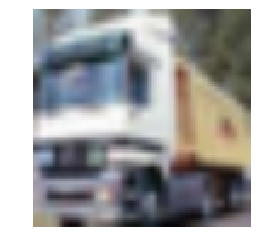

In [46]:
def display_image(img):
 img = cv2.resize(img,(128,128))
 plt.imshow(img)
 plt.axis('off')
    
display_image(x_train[1])

In [47]:
# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Do subtract pixel
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train_orig=y_train
y_test_orig=y_test
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [48]:
image_model= ResNet18((32, 32, 3), include_top= False, weights='imagenet') 
#image_model.summary()
x = keras.layers.GlobalAveragePooling2D()(image_model.output)
output = keras.layers.Dense(n_classes, activation='softmax',name='predictions')(x)

model = keras.models.Model(input=image_model.input, outputs=[output])
model.summary()
model.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.SGD(), metrics=["accuracy"])

W0710 03:13:29.553573 139887784408960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 03:13:29.618146 139887784408960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 03:13:29.621251 139887784408960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0710 03:13:29.622233 139887784408960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0710 03:13:29.623260 139887

44924928/44920640 [==============================] - 2s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("da...)`
  import sys
W0710 03:13:38.609625 139887784408960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
batch_size = 64  # orig paper trained all networks with batch_size=128
epochs = 5
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 61s 1ms/step - loss: 0.8244 - acc: 0.7128 - val_loss: 0.7524 - val_acc: 0.7412
Epoch 2/5
50000/50000 [==============================] - 61s 1ms/step - loss: 0.5958 - acc: 0.7937 - val_loss: 0.6628 - val_acc: 0.7716
Epoch 3/5
19968/50000 [==========>...................] - ETA: 34s - loss: 0.4560 - acc: 0.8415

In [38]:
'''
datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)'''
datagen = ImageDataGenerator(rescale = 1./255,
  horizontal_flip = True,
  fill_mode = "nearest",
  zoom_range = 0.3,
  width_shift_range = 0.3,
  height_shift_range=0.3,
  rotation_range=30)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)
validationgen = ImageDataGenerator(rescale = 1./255,
  horizontal_flip = True,
  fill_mode = "nearest",
  zoom_range = 0.3,
  width_shift_range = 0.3,
  height_shift_range=0.3,
  rotation_range=30)
validationgen.fit(x_test)
print(x_train.__len__(),x_test.__len__() )

50000 10000


In [32]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.__len__(),
                                          epochs=20, verbose=1)

Epoch 1/20
  596/50000 [..............................] - ETA: 27:26 - loss: 1.8004 - acc: 0.4194

KeyboardInterrupt: ignored

In [39]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 204us/step
Test loss: 1.181902942314744
Test accuracy: 0.7961


In [40]:
print(scores)

[1.181902942314744, 0.7961]


In [62]:
def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

plt.figure(figsize=(16,16))

right = 0
mistake = 0

<Figure size 1152x1152 with 0 Axes>

881
777
3506
4745
5584
4551
9557
3541
6315
7436
9409
5312
7048
6141
5188
1041
2746
4715
21
6869
849
4419
5076
6382
167
3305
3961
7678
5791
7279
219
1126
2205
8762
4141
6308
7343
958
408
7949
296
4269
5663
5430
5464
7063
2017
755
6504
4031
3741
4417
9020
3530
1172
1410
8423
2503
2194
9076
2569
879
6106
8808
9894
1028
283
5654
3406
6544
2336
2813
3484
2123
810
8344
1361
8715
4329
344
3021
517
362
8373
6033
6581
9495
3483
7063
229
7934
8994
6756
3872
4916
1924


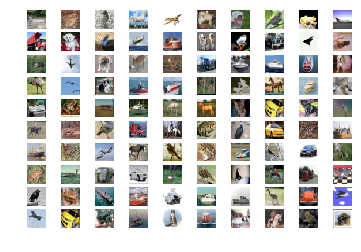

In [63]:


for i in range(0,100):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertCIFER10Data(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n
    #print(y_test_orig[index])
        

    if y_test_orig[index] == bestclass:
        #plt.title(cifar10_labels[bestclass])
        right += 1
    else:
        print(index)
        #plt.title(cifar10_labels[bestclass] + "!=" + cifar10_labels[y_test[index][0]], color='#ff0000')
        mistake += 1


In [71]:
print(right,mistake)

#preds = model.predict(x)
#class_idx = np.argmax(preds[0])
#print(class_idx)
print(model.output.shape)
class_output = model.output[:, 5]
last_conv_layer = model.get_layer("stage4_unit2_conv2")

4 96
(?, 10)


In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x_test])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


In [82]:
#img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(image, 0.6, heatmap, 0.4, 0)
cv2_imshow( image)
cv2_imshow(superimposed_img)
cv2.waitKey(0)

error: ignored